***
***
<div>
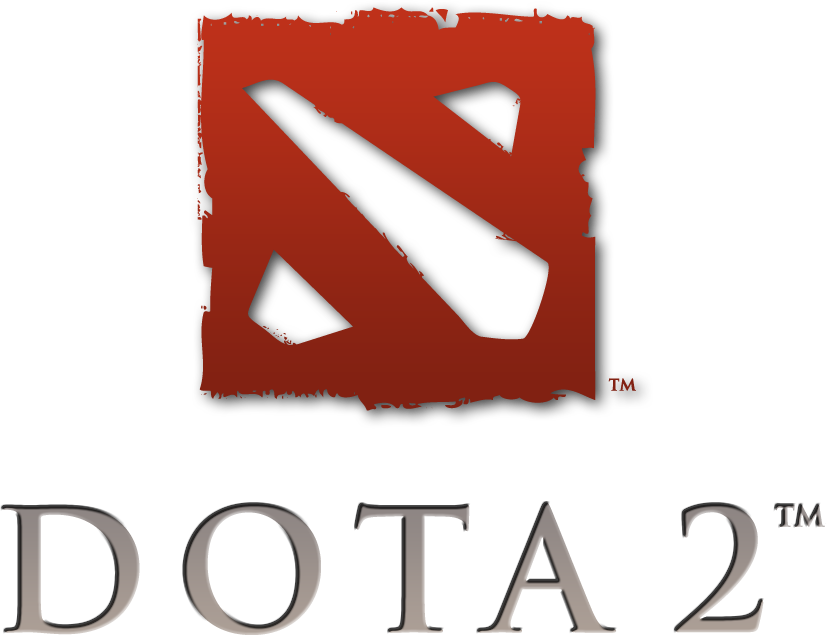
</div>


# <font color=black>DOTA 2 VERİ ÇALIŞMASI</font>


**Veri Seti :**[Kaggle Linki](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=players.csv)

***
***

#### Gerekli kütüphaneler eklenir


In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### Veriler değişkenlere atanır

In [ ]:
games = pd.read_csv("../input/dota-2-matches/players.csv")
hero_names = pd.read_csv("../input/dota-2-matches/hero_names.csv")
match_results = pd.read_csv("../input/dota-2-matches/match.csv")
item_names = pd.read_csv("../input/dota-2-matches/item_ids.csv")
purchases = pd.read_csv("../input/dota-2-matches/purchase_log.csv")
player_ratings = pd.read_csv("../input/dota-2-matches/player_ratings.csv")

In [ ]:
games.head()

In [ ]:
games.shape

In [ ]:
games.info()

#### Null değerlere 0 atanır

In [ ]:
games = games.fillna(0)

In [ ]:
games.info()

In [ ]:
hero_names.head()

In [ ]:
hero_names.shape

In [ ]:
hero_names.info()

In [ ]:
match_results.head()

In [ ]:
match_results.shape

In [ ]:
match_results.info()

In [ ]:
item_names.head()

In [ ]:
item_names.shape

In [ ]:
item_names.info()

In [ ]:
purchases.head()

In [ ]:
purchases.shape

In [ ]:
purchases.info()

In [ ]:
player_ratings.head()

In [ ]:
player_ratings.shape

In [ ]:
player_ratings.info()

#### Tablolardan kullanılıcak kolonlar seçilir

In [ ]:
games = games.iloc[:,:39]

In [ ]:
hero_names = hero_names.iloc[:,-2:]

In [ ]:
match_results = match_results.iloc[:,:10]

In [ ]:
player_ratings = player_ratings.iloc[:,:3]

#### Kullanılacak tablolar birleştirilir

In [ ]:
Dota = pd.merge(hero_names, games, how="left", left_on="hero_id", right_on="hero_id")
Dota.head(10)

In [ ]:
Dota.tail(10)

In [ ]:
Dota.info()

#### Maç bilgisi bulunmayan hero bilgilerinin (null) silinmesi (Arc warden, underlord)

In [ ]:
Dota = Dota[Dota['match_id'].notna()]
Dota.info()

In [ ]:
Dota = pd.merge(match_results, Dota, how="left", left_on="match_id", right_on="match_id")
Dota.head(10)

In [ ]:
Dota.info()

In [ ]:
purchases = pd.merge(item_names, purchases, how="left", left_on="item_id", right_on="item_id")
purchases.head(10)

In [ ]:
Dota.describe()

In [ ]:
Dota.iloc[:,:27].iloc[:,14:].describe()

In [ ]:
Dota.iloc[:,33:].describe()

#### Veri setindeki maç sayısı

In [ ]:
Dota.match_id.nunique()

#### Veri setindeki hesap(account) sayısı

In [ ]:
Dota.account_id.nunique()

#### Veri setindeki kahraman sayısı

In [ ]:
Dota.hero_id.nunique()

#### Veri setinde en çok oynanan kahramanlar

In [ ]:
Dota.localized_name.value_counts().head(10)

#### Veri setinde en az oynanan kahramanlar

In [ ]:
Dota.localized_name.value_counts().tail(10)

In [ ]:
fig,ax = plt.subplots(figsize=(25,10))
Dota['localized_name'].value_counts(sort=False).plot(kind='bar',ax=ax,rot =90)
plt.title('Hero Distribution',fontsize=15)
plt.xlabel('Heroes',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

#### En çok toplam öldürmeye sahip hesap(account)
acount_id = 0 account_id vermek istemeyen hesaplar için kullanılmıştır.

In [ ]:
Dota.groupby(by = "account_id").sum().sort_values(by = "kills", ascending = False).kills.to_frame()

#### Ortalama en çok öldürmeye sahip hesap(account)

In [ ]:
Dota.groupby(by = "account_id").mean().sort_values(by = "kills", ascending = False).kills.to_frame()

#### Ortalama en çok öldürmeye sahip hero

In [ ]:
Dota.groupby(by = "localized_name").mean().sort_values(by = "kills", ascending = False)

#### Ortalama en çok hasar veren hero

In [ ]:
Dota.groupby(by = "localized_name").mean().sort_values(by = "hero_damage", ascending = False)

#### Ortalama en çok son vuruşa sahip hero

In [ ]:
Dota.groupby(by = "localized_name").mean().sort_values(by = "last_hits", ascending = False)

#### Ortalama en çok dakika başına para kazanan hero

In [ ]:
Dota.groupby(by = "localized_name").mean().sort_values(by = "gold_per_min", ascending = False)

#### Radiant kazanılan maç sayısı

In [ ]:
len(match_results.loc[match_results.radiant_win == True])

#### Dire kazanılan maç sayısı

In [ ]:
len(match_results.loc[match_results.radiant_win == False])

In [ ]:
print('The number of wins are equal to each team? {}'.format(
    round(len(match_results.loc[match_results.radiant_win == True])/len(match_results.loc[match_results.radiant_win == False]), 1) == 1
))
print('How much is this advantage ratio? {}%'.format(
    round(len(match_results.loc[match_results.radiant_win == True])/len(match_results.loc[match_results.radiant_win == False]) - 1, 3) * 100
))

In [ ]:
y = match_results['radiant_win'].apply(lambda win: True if win else False)
classes = ['Dire Win', 'Radiant Win']
_ = pd.Series(y).apply(lambda i: classes[i]).value_counts().plot(kind = 'bar')

In [ ]:
X = [match_results.radiant_win[(match_results['radiant_win']==True)].count(),match_results.radiant_win[(match_results['radiant_win']==False)].count()]
Y = ["RadiantWin","DireWin"]
plt.pie(X, labels=Y, startangle=90, autopct='%.1f%%')
plt.show()
plt.ioff()

#### Veri setinde en çok satın alınan itemlar

In [ ]:
purchases.item_name.value_counts().to_frame().head(10)

#### Veri setinde en az satın alınan itemlar

In [ ]:
purchases.item_name.value_counts().to_frame().tail(10)

In [ ]:
fig,ax = plt.subplots(figsize=(30,20))
purchases['item_name'].value_counts(sort=False).plot(kind='bar',ax=ax,rot =90)
plt.title('Item Distribution',fontsize=15)
plt.xlabel('Items',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

#### Veri setinde en fazla oyun kazanmış kullanıcılar

In [ ]:
player_ratings.groupby(by = "account_id").mean().sort_values(by = "total_wins", ascending = False)

#### Korelasyon Matrisleri

In [ ]:
corrMatrix = Dota.corr()
f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
corrMatrix = games.corr()
f, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
corrMatrix = match_results.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
corrMatrix = player_ratings.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrMatrix, annot=True)
plt.show()